## **This program showcases reviews of:**
### **Dell Inspiron 7490 14-inch FHD Display Laptop (10th Gen i5-10210U/8GB/512GB SSD/Win 10 + MS Office/Integrated Graphics), Silver**

## **using Unigram wordcloud and Bigram Wordcloud**



In [32]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [33]:
# creating empty reviews list 
dell_reviews=[]


In [34]:
for i in range(1,21):
  ip=[]  
  url="https://www.amazon.in/Dell-Inspiron-7490-i5-10210U-Integrated/product-reviews/B08C5DS6ZQ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.find_all("span",attrs={"class","a-size-base review-text review-text-content"})# Extracting the content under specific tags  
  for i in range(len(reviews)):
    ip.append(reviews[i].text)  

    dell_reviews= dell_reviews+ip  # adding the reviews of one page to empty list which in future contains all the reviews


In [35]:
ip

[]

In [36]:
dell_reviews

['\n\n  Sound quality is very very poor. System performance is also slow.High price and low quality product.Don’t buy.\n\n',
 '\n\n  Sound quality is very very poor. System performance is also slow.High price and low quality product.Don’t buy.\n\n',
 "\n\n  I recently bought a DELL Inspiron 7591, and it has been a nightmare. First of all the the delivery was horribly delayed and I the customer care service was pathetic. Nobody answered the calls, the wait times were as long as 60 to 75 minutes at the end of which the call used to get disconnected, horrible experience. The product delivered to me was drenched in water, luckily it worked okay. But it has the worst thermal. Gets overheated quickly. I also tried to avail of the Dell offers Sennheiser headphone. That was another tragedy all together. The delivery for that is delayed by 45 days, the portal doesn't get updated quickly, the customer care executives are uncouth, don't help, are rude. Worst experience. I would suggest noone buy 

In [37]:
# writng reviews in a text file 
with open("oneplus.txt","w",encoding='utf8') as output:
    output.write(str(dell_reviews))

In [38]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(dell_reviews)

In [39]:
import nltk
# from nltk.corpus import stopwords

In [40]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ", ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ", ip_rev_string)

In [41]:
# words that contained in iphone XR reviews
ip_reviews_words = ip_rev_string.split(" ")
ip_reviews_words

['',
 'sound',
 'quality',
 'is',
 'very',
 'very',
 'poor',
 'system',
 'performance',
 'is',
 'also',
 'slow',
 'high',
 'price',
 'and',
 'low',
 'quality',
 'product',
 'don',
 't',
 'buy',
 'sound',
 'quality',
 'is',
 'very',
 'very',
 'poor',
 'system',
 'performance',
 'is',
 'also',
 'slow',
 'high',
 'price',
 'and',
 'low',
 'quality',
 'product',
 'don',
 't',
 'buy',
 'i',
 'recently',
 'bought',
 'a',
 'dell',
 'inspiron',
 'and',
 'it',
 'has',
 'been',
 'a',
 'nightmare',
 'first',
 'of',
 'all',
 'the',
 'the',
 'delivery',
 'was',
 'horribly',
 'delayed',
 'and',
 'i',
 'the',
 'customer',
 'care',
 'service',
 'was',
 'pathetic',
 'nobody',
 'answered',
 'the',
 'calls',
 'the',
 'wait',
 'times',
 'were',
 'as',
 'long',
 'as',
 'to',
 'minutes',
 'at',
 'the',
 'end',
 'of',
 'which',
 'the',
 'call',
 'used',
 'to',
 'get',
 'disconnected',
 'horrible',
 'experience',
 'the',
 'product',
 'delivered',
 'to',
 'me',
 'was',
 'drenched',
 'in',
 'water',
 'luckily',

In [42]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ip_reviews_words, use_idf=True,ngram_range=(1, 3))
X = vectorizer.fit_transform(ip_reviews_words)

C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=['', 'sound', 'quality', 'is', 'very', 'very', 'poor', 'system', 'performance', 'is', 'also', 'slow', 'high', 'price', 'and', 'low', 'quality', 'product', 'don', 't', 'buy', 'sound', 'quality', 'is', 'very', 'very', 'poor', 'system', 'performance', 'is', 'also', 'slow', 'high', 'price', 'and', 'low', 'quality', 'product', 'don', 't', 'buy', 'i', 'recently', 'bought', 'a', 'dell', 'inspiron', 'and', 'it', 'has', 'been', 'a', 'nightmare', 'first', 'of', 'all', 'the', 'the', 'delivery', 'was', 'horribly', 'delayed', 'and', 'i', 'the', 'customer', 'care', 'service', 'was', 'pathetic', 'nobody', 'answered', 'the', 'calls', 'the', 'wait', 'times', 'were', 'as', 'long', 'as', 'to', 'minutes', 'at', 'the', 'end', 'of', 'which', 'the', 'call', 'used', 'to', 'get', 'disconnected', 'horrible', 'experience', 'the', 'product', 'delivered', 'to', 'me', 'was', 'drenched', 'in', 'water', 'luckily', 'i

In [43]:
with open("stop.txt","r") as sw:
    stop_words = sw.read()

In [44]:
stop_words = stop_words.split("\n")

stop_words.extend(["dell","laptop","time","windows","laptop","device","screen","battery","product","good","day","price"])


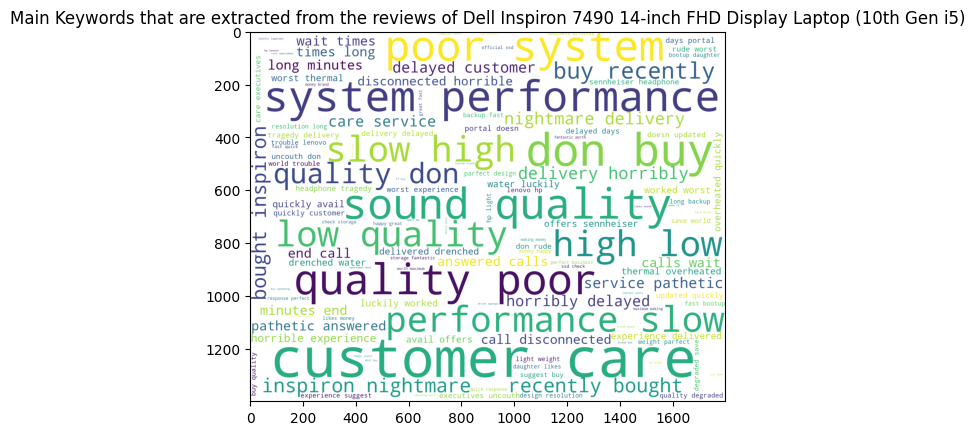

In [51]:
ip_reviews_words = [w for w in ip_reviews_words if not w in stop_words]

# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)
wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)
plt.title("Main Keywords that are extracted from the reviews of Dell Inspiron 7490 14-inch FHD Display Laptop (10th Gen i5)")
plt.show()

In [46]:
# WordCloud can be performed on the string inputs.
# Corpus level word cloud
# positive words # Choose the path for +ve words stored in system
with open(r"positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

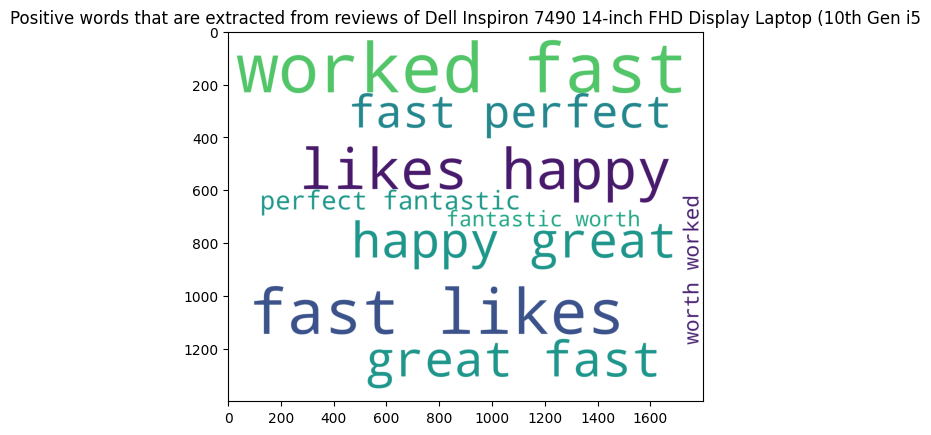

In [52]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

wordcloud_pos_in_pos = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.figure(2)
plt.title("Positive words that are extracted from reviews of Dell Inspiron 7490 14-inch FHD Display Laptop (10th Gen i5")
plt.imshow(wordcloud_pos_in_pos)
plt.show()

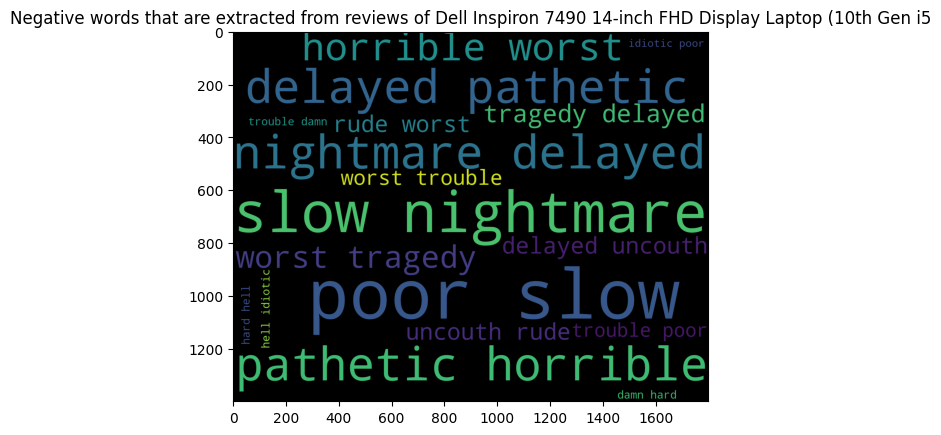

In [53]:
# negative words Choose path for -ve words stored in system
with open(r"negative-words.txt", "r") as neg:
  negwords = neg.read().split("\n")

# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)
plt.figure(3)
plt.title("Negative words that are extracted from reviews of Dell Inspiron 7490 14-inch FHD Display Laptop (10th Gen i5")
plt.imshow(wordcloud_neg_in_neg)
plt.show()

# **Word cloud with Bigram**

In [56]:
# wordcloud with bigram
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to C:\Users\Shrey Kumar
[nltk_data]     Soni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [58]:
WNL = nltk.WordNetLemmatizer() # it groups up similar word i.e words with similar meaning

# Lowercase and tokenize
text = ip_rev_string.lower()

In [59]:
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")

In [60]:
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

In [61]:
# Remove extra chars and remove stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]
text_content

['sound',
 'quality',
 'poor',
 'system',
 'performance',
 'slow',
 'high',
 'low',
 'quality',
 'don',
 'buy',
 'sound',
 'quality',
 'poor',
 'system',
 'performance',
 'slow',
 'high',
 'low',
 'quality',
 'don',
 'buy',
 'recently',
 'bought',
 'inspiron',
 'nightmare',
 'delivery',
 'horribly',
 'delayed',
 'customer',
 'care',
 'service',
 'pathetic',
 'answered',
 'calls',
 'wait',
 'times',
 'long',
 'minutes',
 'end',
 'call',
 'disconnected',
 'horrible',
 'experience',
 'delivered',
 'drenched',
 'water',
 'luckily',
 'worked',
 'worst',
 'thermal',
 'overheated',
 'quickly',
 'avail',
 'offers',
 'sennheiser',
 'headphone',
 'tragedy',
 'delivery',
 'delayed',
 'days',
 'portal',
 'doesn',
 'updated',
 'quickly',
 'customer',
 'care',
 'executives',
 'uncouth',
 'don',
 'rude',
 'worst',
 'experience',
 'suggest',
 'buy',
 'quality',
 'degraded',
 'save',
 'world',
 'trouble',
 'lenovo',
 'hp',
 'sound',
 'quality',
 'poor',
 'system',
 'performance',
 'slow',
 'high',
 'lo

In [62]:
# Create a set of stopwords
stopwords_wc = set(STOPWORDS)
customised_words = ['price', 'great','Dell', 'laptop', 'inspiron'] # If you want to remove any particular word form text which does not contribute much in meaning


In [63]:
new_stopwords = stopwords_wc.union(customised_words)
# Remove stop words
text_content = [word for word in text_content if word not in new_stopwords]

# Take only non-empty entries
text_content = [s for s in text_content if len(s) != 0]

In [64]:
# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]

In [65]:
nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.bigrams(text_content))
print(bigrams_list)

[('sound', 'quality'), ('quality', 'poor'), ('poor', 'system'), ('system', 'performance'), ('performance', 'slow'), ('slow', 'high'), ('high', 'low'), ('low', 'quality'), ('quality', 'don'), ('don', 'buy'), ('buy', 'sound'), ('sound', 'quality'), ('quality', 'poor'), ('poor', 'system'), ('system', 'performance'), ('performance', 'slow'), ('slow', 'high'), ('high', 'low'), ('low', 'quality'), ('quality', 'don'), ('don', 'buy'), ('buy', 'recently'), ('recently', 'bought'), ('bought', 'nightmare'), ('nightmare', 'delivery'), ('delivery', 'horribly'), ('horribly', 'delayed'), ('delayed', 'customer'), ('customer', 'care'), ('care', 'service'), ('service', 'pathetic'), ('pathetic', 'answered'), ('answered', 'call'), ('call', 'wait'), ('wait', 'time'), ('time', 'long'), ('long', 'minute'), ('minute', 'end'), ('end', 'call'), ('call', 'disconnected'), ('disconnected', 'horrible'), ('horrible', 'experience'), ('experience', 'delivered'), ('delivered', 'drenched'), ('drenched', 'water'), ('water

In [68]:
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

['sound quality', 'quality poor', 'poor system', 'system performance', 'performance slow', 'slow high', 'high low', 'low quality', 'quality don', 'don buy', 'buy sound', 'sound quality', 'quality poor', 'poor system', 'system performance', 'performance slow', 'slow high', 'high low', 'low quality', 'quality don', 'don buy', 'buy recently', 'recently bought', 'bought nightmare', 'nightmare delivery', 'delivery horribly', 'horribly delayed', 'delayed customer', 'customer care', 'care service', 'service pathetic', 'pathetic answered', 'answered call', 'call wait', 'wait time', 'time long', 'long minute', 'minute end', 'end call', 'call disconnected', 'disconnected horrible', 'horrible experience', 'experience delivered', 'delivered drenched', 'drenched water', 'water luckily', 'luckily worked', 'worked worst', 'worst thermal', 'thermal overheated', 'overheated quickly', 'quickly avail', 'avail offer', 'offer sennheiser', 'sennheiser headphone', 'headphone tragedy', 'tragedy delivery', 'de

In [66]:
# Using count vectoriser to view the frequency of bigrams
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_

{'sound quality': 99,
 'quality poor': 87,
 'poor system': 83,
 'system performance': 106,
 'performance slow': 82,
 'slow high': 98,
 'high low': 52,
 'low quality': 68,
 'quality don': 86,
 'don buy': 34,
 'buy sound': 13,
 'buy recently': 12,
 'recently bought': 91,
 'bought nightmare': 5,
 'nightmare delivery': 75,
 'delivery horribly': 30,
 'horribly delayed': 54,
 'delayed customer': 26,
 'customer care': 21,
 'care service': 18,
 'service pathetic': 97,
 'pathetic answered': 80,
 'answered call': 0,
 'call wait': 16,
 'wait time': 114,
 'time long': 109,
 'long minute': 67,
 'minute end': 72,
 'end call': 39,
 'call disconnected': 15,
 'disconnected horrible': 32,
 'horrible experience': 53,
 'experience delivered': 41,
 'delivered drenched': 28,
 'drenched water': 37,
 'water luckily': 115,
 'luckily worked': 69,
 'worked worst': 117,
 'worst thermal': 120,
 'thermal overheated': 108,
 'overheated quickly': 78,
 'quickly avail': 89,
 'avail offer': 1,
 'offer sennheiser': 76,
 

In [70]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:100])

[('customer care', 154), ('don buy', 99), ('sound quality', 88), ('quality poor', 88), ('poor system', 88), ('system performance', 88), ('performance slow', 88), ('slow high', 88), ('high low', 88), ('low quality', 88), ('quality don', 88), ('buy recently', 77), ('recently bought', 77), ('bought nightmare', 77), ('nightmare delivery', 77), ('delivery horribly', 77), ('horribly delayed', 77), ('delayed customer', 77), ('care service', 77), ('service pathetic', 77), ('pathetic answered', 77), ('answered call', 77), ('call wait', 77), ('wait time', 77), ('time long', 77), ('long minute', 77), ('minute end', 77), ('end call', 77), ('call disconnected', 77), ('disconnected horrible', 77), ('horrible experience', 77), ('experience delivered', 77), ('delivered drenched', 77), ('drenched water', 77), ('water luckily', 77), ('luckily worked', 77), ('worked worst', 77), ('worst thermal', 77), ('thermal overheated', 77), ('overheated quickly', 77), ('quickly avail', 77), ('avail offer', 77), ('of

<Figure size 7000x10000 with 0 Axes>

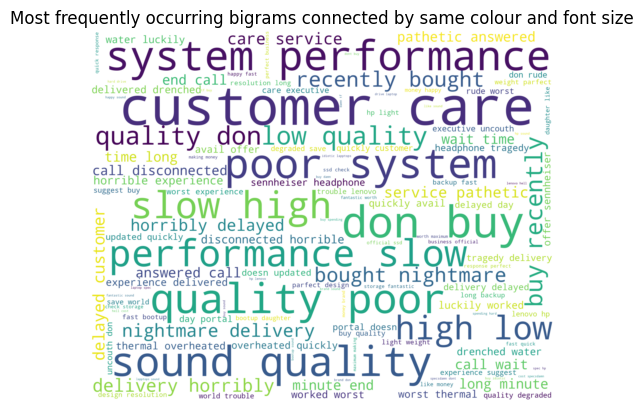

In [73]:
# Generating wordcloud
words_dict = dict(words_freq)
WC_height = 2000
WC_width = 2500
WC_max_words = 200
wordCloud = WordCloud(background_color='white',max_words=WC_max_words, height=WC_height, width=WC_width, stopwords=new_stopwords)
wordCloud.generate_from_frequencies(words_dict)

plt.figure(figsize= (70,100))
plt.figure(4)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()